In [5]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest


In [6]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

In [8]:
print(train_df.isnull().sum())
print(test_df.isnull().sum())


trip_distance              0
rate_code                  0
store_and_fwd_flag         0
payment_type               0
fare_amount                0
extra                      0
mta_tax                    0
tip_amount                 0
tolls_amount               0
imp_surcharge              0
total_amount               0
pickup_location_id         0
dropoff_location_id        0
year                       0
month                      0
day                        0
day_of_week                0
hour_of_day                0
trip_duration              0
calculated_total_amount    0
dtype: int64
trip_distance          0
rate_code              0
store_and_fwd_flag     0
payment_type           0
fare_amount            0
extra                  0
mta_tax                0
tip_amount             0
tolls_amount           0
imp_surcharge          0
total_amount           0
pickup_location_id     0
dropoff_location_id    0
year                   0
month                  0
day                    0
day_of_

In [9]:
#removing the outliers
train_df = train_df[train_df["fare_amount"]>0]

train_df =train_df[train_df["trip_distance"]>0]

train_df = train_df[train_df["fare_amount"]<1000]


train_df = train_df[train_df["trip_duration"]>0]
train_df = train_df[train_df["trip_duration"]<7200]

In [ ]:
# Encode 
categorical_cols = ['payment_type', 'rate_code', 'store_and_fwd_flag', 'pickup_location_id', 'dropoff_location_id']
train_df = pd.get_dummies(train_df, columns=categorical_cols, drop_first=True)
test_df = pd.get_dummies(test_df, columns=categorical_cols, drop_first=True)

# Align test columns with train
missing_cols = set(train_df.columns) - set(test_df.columns)
for c in missing_cols:
    if c != 'fare_amount':
        test_df[c] = 0

# Ensure same column order
test_df = test_df[train_df.drop(columns=['fare_amount']).columns]


In [11]:
# Target variable
y = train_df['fare_amount']

# Features (all columns except target)
X = train_df.drop(columns=['fare_amount'])

# Test features
X_test = test_df


In [12]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [14]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Initialize model
model = XGBRegressor(n_estimators=500, learning_rate=0.05, max_depth=6, random_state=42)

# Train
model.fit(X_train, y_train)

# Validation
y_pred = model.predict(X_valid)
rmse = np.sqrt(mean_squared_error(y_valid, y_pred))
print(f"Validation RMSE: {rmse}")


Validation RMSE: 3.748219770960329


In [15]:
test_df['predicted_fare'] = model.predict(X_test)

# Save predictions
test_df[['predicted_fare']].to_csv('submission.csv', index=False)


In [16]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_valid)

rmse_lr = np.sqrt(mean_squared_error(y_valid, y_pred_lr))
print(f"Linear Regression RMSE: {rmse_lr}")


Linear Regression RMSE: 0.14731666914082484


In [17]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=200, max_depth=10, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_valid)

rmse_rf = np.sqrt(mean_squared_error(y_valid, y_pred_rf))
print(f"Random Forest RMSE: {rmse_rf}")


Random Forest RMSE: 3.154573681807245


In [18]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(n_estimators=500, learning_rate=0.05, max_depth=5, random_state=42)
gbr.fit(X_train, y_train)
y_pred_gbr = gbr.predict(X_valid)

rmse_gbr = np.sqrt(mean_squared_error(y_valid, y_pred_gbr))
print(f"Gradient Boosting RMSE: {rmse_gbr}")


Gradient Boosting RMSE: 2.543161871868895


Matplotlib is building the font cache; this may take a moment.


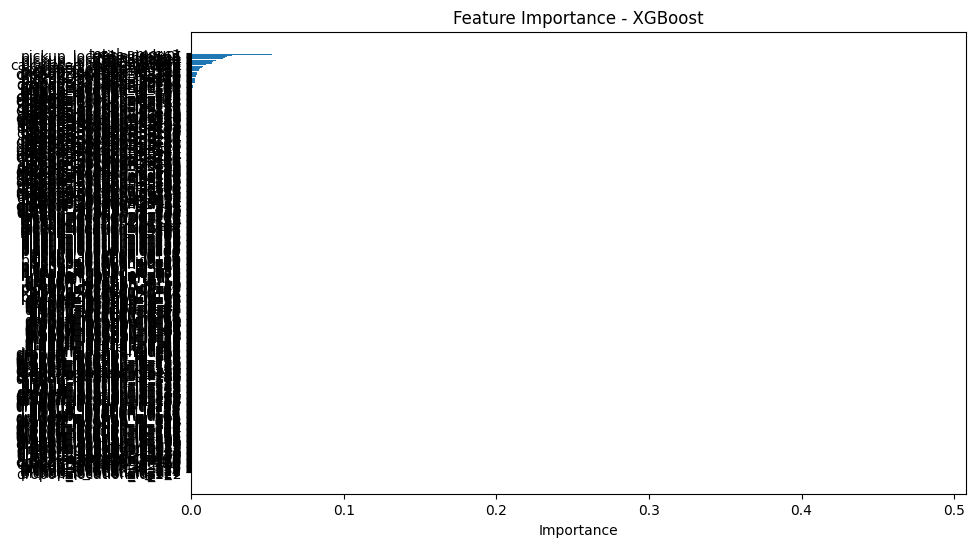

In [19]:
import matplotlib.pyplot as plt
import pandas as pd

# Get feature importance
importance = model.feature_importances_
features = X_train.columns

# Create dataframe
feat_imp = pd.DataFrame({'Feature': features, 'Importance': importance})
feat_imp = feat_imp.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10,6))
plt.barh(feat_imp['Feature'], feat_imp['Importance'])
plt.gca().invert_yaxis()
plt.xlabel("Importance")
plt.title("Feature Importance - XGBoost")
plt.show()


In [20]:
feat_imp_rf = pd.DataFrame({'Feature': X_train.columns, 'Importance': rf.feature_importances_})
feat_imp_rf = feat_imp_rf.sort_values(by='Importance', ascending=False)
print(feat_imp_rf.head(10))


                    Feature  Importance
6              total_amount    0.933837
0             trip_distance    0.026141
3                tip_amount    0.019460
4              tolls_amount    0.014406
12            trip_duration    0.001315
10              day_of_week    0.000616
13  calculated_total_amount    0.000434
9                       day    0.000384
11              hour_of_day    0.000341
20              rate_code_5    0.000327


In [21]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Suppose we already trained XGBoost model
y_pred = model.predict(X_valid)  # predict fares on validation set

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_valid, y_pred))
print(f"Validation RMSE: {rmse}")


Validation RMSE: 3.748219770960329


In [22]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

# Predict
y_pred_lr = lr.predict(X_valid)

# RMSE
rmse_lr = np.sqrt(mean_squared_error(y_valid, y_pred_lr))
print(f"Linear Regression RMSE: {rmse_lr}")


Linear Regression RMSE: 0.14731666914082484


In [23]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=200, max_depth=10, random_state=42)
rf.fit(X_train, y_train)

# Predict
y_pred_rf = rf.predict(X_valid)

# RMSE
rmse_rf = np.sqrt(mean_squared_error(y_valid, y_pred_rf))
print(f"Random Forest RMSE: {rmse_rf}")


Random Forest RMSE: 3.154573681807245


In [24]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(n_estimators=500, learning_rate=0.05, max_depth=5, random_state=42)
gbr.fit(X_train, y_train)

# Predict
y_pred_gbr = gbr.predict(X_valid)

# RMSE
rmse_gbr = np.sqrt(mean_squared_error(y_valid, y_pred_gbr))
print(f"Gradient Boosting RMSE: {rmse_gbr}")


Gradient Boosting RMSE: 2.543161871868895


In [25]:
from xgboost import XGBRegressor

xgb = XGBRegressor(n_estimators=500, learning_rate=0.05, max_depth=6, random_state=42)
xgb.fit(X_train, y_train)

# Predict
y_pred_xgb = xgb.predict(X_valid)

# RMSE
rmse_xgb = np.sqrt(mean_squared_error(y_valid, y_pred_xgb))
print(f"XGBoost RMSE: {rmse_xgb}")


XGBoost RMSE: 3.748219770960329
